In [4]:
import pandas as pd
from sklearn.datasets import load_files
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neural_network import MLPClassifier
'''
MLP (Perceptronul multistrat) este un algoritm supervizat de învățare.
Acesta învață o funcție, prin antrenament pe un set de date.
Cu ajutorul unui set de caracteristici și a rezultatului acestora poate învăța să aproximeze o funcție nonlineară,
fie pentru clasificare, fie pentru regresie.
Perceptronul Multistrat este diferit de regresiile logistice în sensul că între stratul de intrare și cel de ieșire
pot exista unul sau mai multe straturi neliniare, numite straturi ascunse.

https://scikit-learn.org/stable/modules/neural_networks_supervised.html
'''
from sklearn import svm
'''
În general, SVM sunt considerate a fi o abordare de clasificare, dar pot fi utilizate în ambele
tipuri de probleme de clasificare și regresie.
Se poate ocupa cu ușurință mai multe variabile continue și categorice.
SVM construiește un hyperplan în spațiul multidimensional pentru a separa diferite clase.
SVM generează un hyperplan optim într-o manieră iterativă, care este folosită pentru a minimiza o eroare.
Ideea principală a SVM este găsirea unui hiperplan marginal maxim (MMH) care divide cel mai bine setul de date în clase.
Clasificatorul separă punctele de date utilizând un hyperplane cu cea mai mare valoare a marjei. De aceea, un clasificator
SVM este, de asemenea, cunoscut ca un clasificator discriminativ.
SVM oferă o precizie foarte mare în comparație cu alți clasificatori, cum ar fi regresia logistică și arborii de decizie.
'''
from sklearn import tree #Decision tree
'''
Are ca scop divizarea unei colecţii în seturi mai mici prin aplicarea succesivă a unor reguli de decizie.
În arborele de decizie, nodurile rădăcină și interne conțin condiții de testare a atributelor pentru a separa
înregistrările care au caracteristici diferite.
'''
from sklearn.ensemble import RandomForestClassifier
'''
Random Forest Classifier este o metoda de clasificare, regresie si alte sarcini care opereaza prin construirea prin construirea
unei multitudini de arbori de decizie în timpul antrenării și furnizarea clasei necesare clasificării sau a mediei (în cazul
unei regresii) a arborilor individuali. De asemenea, corectează obiceiul de overfitting pe setul de antrenare.
'''

from sklearn.neighbors import KNeighborsClassifier
'''
Este un algoritm de învățare supervizată bazat pe asocieri care nu
necesită o etapă de antrenare propriu-zisă. Se bazează pe învățarea prin analogie și
stabilește clasa corespunzătoare unui exemplu de testare pe baza similarității acestuia
cu k exemple, cele mai similare, din setul de date de antrenament.
Cele k exemple luate în considerare vor stabili clasa exemplului de test pe baza votului majoritar. 
'''

'\nEste un algoritm de învățare supervizată bazat pe asocieri care nu\nnecesită o etapă de antrenare propriu-zisă. Se bazează pe învățarea prin analogie și\nstabilește clasa corespunzătoare unui exemplu de testare pe baza similarității acestuia\ncu k exemple, cele mai similare, din setul de date de antrenament.\nCele k exemple luate în considerare vor stabili clasa exemplului de test pe baza votului majoritar. \n'

<h1> Setul de date IMDB </h1>

- Descriere/Continut:
Contine fraze etichetate ca parere pozitiva sau parere negativa, extrase din recenziile produselor de pe site-ul amazon.com.

- Format:
propozitie \t scor \n

- Detalii:
Scorul poate fi 1 (pentru recenzie pozitiva) sau 0 (pentru recenzie negativa).
In setul de date exista 500 de fragmente de recenzii pozitive si 500 de fragmente de recenzii negative, care au fost selectate in mod aleator pentru baze si mai mari de recenzii.
S-a incercat selectarea frazelor care au o conotatie pozitiva/negativa clara, sperand ca nicio fraza neutra sa nu fi fost aleasa.

- Se urmareste analizarea opiniei pentru a determina daca este una negativa sau pozitiva in legatura cu produsul respectiv; 


In [6]:
namesCol = ["Review","Sentiment"]
df=pd.read_csv('amazon_cells_labelled.txt', delimiter = '\t', header = None, names=namesCol)

In [7]:
df.head()

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
print("Dimensiunea tabelului este: ", df.shape)

Dimensiunea tabelului este:  (1000, 2)


In [16]:
df.describe()

,Sentiment,review_len,word_count
count,1000.00000,1000.000000,1000.000000
mean,0.50000,55.007000,10.189000
std,0.50025,34.489193,6.639983
min,0.00000,11.000000,1.000000
25%,0.00000,26.000000,5.000000
50%,0.50000,47.000000,9.000000
75%,1.00000,77.000000,15.000000
max,1.00000,149.000000,30.000000


- lungimea maxima a unei recenzii este de 30 de cuvinte
- lungimea minima a unei recenzii este de 1 cuvant
- lungimea medie  a unei recenzii este de 10 cuvinte

In [13]:
df.describe(include=['O'])

,Review
count,1000
unique,987
top,great phone.
freq,4


- convertim textul la scriere cu litera mica pentru a evita ca de exemplu "Plot" si "plot" sa fie luate ca elemente diferite

In [9]:
df['Review']=df['Review'].str.lower()

- eliminam cifrele

In [10]:
import re
df['Review']=df['Review'].str.replace(r'\d+','')

- adaugam coloane noi pentru numarul de cuvinte pe care il contine o recenzie si pentru lungimea recenziei


In [11]:
df['review_len'] = df['Review'].astype(str).apply(len)
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [12]:
df.head()

,Review,Sentiment,review_len,word_count
0,so there is no way for me to plug it in here i...,0,82,21
1,"good case, excellent value.",1,27,4
2,great for the jawbone.,1,22,4
3,tied to charger for conversations lasting more...,0,77,10
4,the mic is great.,1,17,4


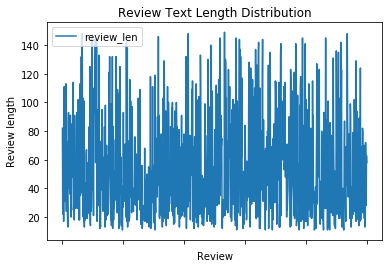

In [26]:
import matplotlib.pyplot as plt
#df['Sentiment'].plot(legend=True)
#df['review_len'].plot(kind=legend=True)
ax=df.plot(0,2,
    legend=True,
    title='Review Text Length Distribution')
ax.set_xlabel("Review")
ax.set_ylabel("Review length")
plt.show()

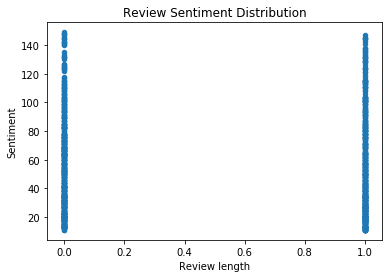

In [21]:
ax=df.plot(1,2,
    kind='scatter',
    legend=True,
    title='Review Sentiment Distribution')
ax.set_xlabel("Review length")
ax.set_ylabel("Sentiment")
plt.show()

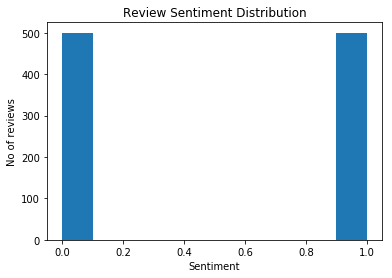

In [22]:
ax=df['Sentiment'].plot(kind='hist',
                       title='Review Sentiment Distribution')
ax.set_xlabel("Sentiment")
ax.set_ylabel("No of reviews")
plt.show()

In [33]:
X=df.iloc[:,0].values
y=np.ravel(df.iloc[:,1])

- se foloseste clasa <b>CountVectorizer</b>, care serveste la selectarea cuvintelor din text si calculul frecventei de aparitie;
- prin aplicarea metodei transform se va obtine un vector <b>Bag Of Words</b>;

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer().fit(df['Review'])
bag_of_words = vec.transform(df['Review'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [56]:
words_freq[:15]

[('the', 519),
 ('it', 311),
 ('and', 311),
 ('is', 243),
 ('this', 208),
 ('to', 197),
 ('phone', 168),
 ('my', 145),
 ('for', 121),
 ('of', 120),
 ('not', 117),
 ('with', 112),
 ('very', 104),
 ('great', 99),
 ('was', 90)]

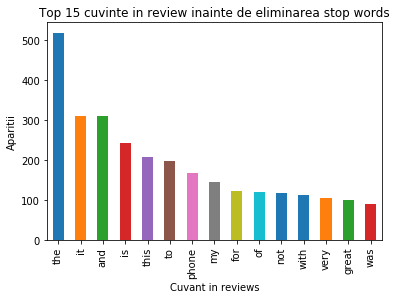

In [36]:
df1 = pd.DataFrame(words_freq[:15], columns = ['ReviewText' , 'count'])
ax=df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 15 cuvinte in review inainte de eliminarea stop words')
ax.set_ylabel("Aparitii")
ax.set_xlabel("Cuvant in reviews")
plt.show()

- Excludere cuvinte neinformative(stop words)


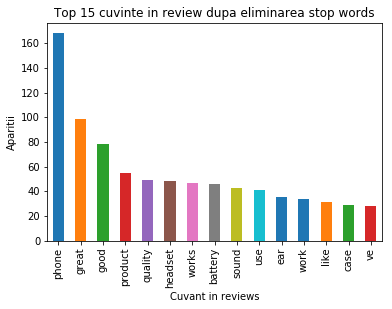

In [27]:
vec = CountVectorizer(stop_words = 'english').fit(df['Review'])
bag_of_words = vec.transform(df['Review'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

df1 = pd.DataFrame(words_freq[:15], columns = ['ReviewText' , 'count'])
ax=df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', 
    title='Top 15 cuvinte in review dupa eliminarea stop words')
ax.set_ylabel("Aparitii")
ax.set_xlabel("Cuvant in reviews")
plt.show()

In [51]:
feature_names=vec.get_feature_names()
print(len(feature_names))

1802


- vocabularul are un total de 1802 cuvinte;
- pentru fiecare cuvant in parte este precizat si de cate ori a fost intalnit in texte;


In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

- TfidfVectorizer “Term Frequency – Inverse Document”
- Term Frequency -insumeaza aparitiile unui cuvant in documentul dat
- Inverse Document Frequency -reduce cuvintele care apar de foarte multe ori in document

In [17]:
tfidf_vectorizer = TfidfVectorizer()
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=1/3,random_state=1, stratify=y)
tfidf = tfidf_vectorizer.fit_transform(X_trainval)

In [58]:
print(tfidf_vectorizer.idf_)

[6.80964287 6.40417776 6.80964287 ... 4.45826761 6.80964287 6.80964287]


K-means Clustering propune centri de cluster care sa minimizeze valoarea functiei.

Scop: partitionarea datelor in grupuri. 

Ideal, clusterele ar trebui sa aiba urmatoarele proprietati: 
- punctele dintr-un cluster oarecare ar trebui sa fie similare
- punctele din clustere diferite sa fie foarte diferite. 
Pentru un punct nou dat trebuie determinat clusterul de care apartine. 

In [24]:
kmeans = KMeans(n_clusters=2).fit(tfidf)
test2=kmeans.predict(tfidf_vectorizer.transform(X_test))
test=np.array(test2==y_test, dtype=int)
test=pd.DataFrame(test)

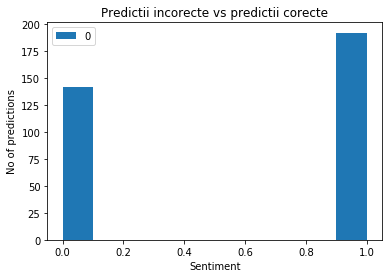

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
ax=test.plot(kind='hist',
            title='Predictii incorecte vs predictii corecte')
ax.set_xlabel("Sentiment")
ax.set_ylabel("No of predictions")
plt.show()
print(bag_of_words.toarray())

<b>Hiperparametrii</b> sunt parametrii care nu sunt direct invatati de estimatori. In scikit-learn ei sunt dati ca argumente la constructorul claselor de estimare.

O cautare are:
- un estimator (regresor sau clasificator);
- un spatiu pentru parametri;
- o metoda de cautare sau de a imparti datele in sample-uri;
- o schema pentru cross validation;
- o functie pentru scoring;

<b>Grid Search</b> genereaza in mod exhaustiv valori-candidat dintr-o lista de valori de parametri specificate prin param_grid. Instanta GridSearchCV implementeaza estimatorul obisnuit API, cand se incearca pe un set de date toate combinatiile posibile ale valorilor parametrilor, fiind evaluate, ca in final sa fie aleasa combinatia optima. 

Desi folosirea unui grid de valori pentru parametrii este cea mai utilizata metoda de optimizare a parametrilor, alte metode de cautare au proprietati mai favorabile. 

<b>RandomSearchCV</b> implementeaza o cautare aleatorie peste parametri, unde fiecare setare este luata dintr-o distributie pe valorile posibile ale parametrilor. Acest lucru are doua mari beneficii fata de modul exhaustiv de cautare:

- un buget poate fi ales independent de numarul parametrilor sau posibilele valori;
- adaugand parametri care nu influenteaza performanta, nu face sa scada eficienta;

In [35]:
def score_report(model, parameters):
    model_GS = GridSearchCV(model, param_grid=parameters,scoring='f1_macro', cv = 5, iid = False, return_train_score=True, n_jobs=-1)
    model_RS = RandomizedSearchCV(estimator = model, param_distributions = parameters,scoring='f1_macro', cv=5, n_iter=5, iid=False, n_jobs=-1)
    scores_GS = cross_validate(model_GS, bag_of_words, y, return_train_score=True, scoring=('f1_macro','accuracy'),cv=5)
    scores_RS = cross_validate(model_RS, bag_of_words, y, return_train_score=True, scoring=('f1_macro','accuracy'),cv=5)
    return scores_GS, scores_RS

<h3>Creare tabel pentru rezultatele clasificatorilor</h3>

In [39]:
results = pd.DataFrame(columns = ['Model',
                                  'Search_strategy',
                                  'train_f1_macro',
                                  'test_f1_macro',
                                  'train_accuracy',
                                  'test_accuracy',
                                  'score_time',
                                  'fit_time'])
def make_line(model:str, search_strategy:str, results):
    results['Model'] = model
    results['Search_strategy'] = search_strategy
    for key, value in results.items():
        if(type(results[key])!=str):
            results[key] = results[key].mean()
    return results

<h1>Decision Tree Classifier</h1>

In [40]:
parameters = {
        'min_samples_split':[2,5,8, 10],
        'splitter':['best', 'random'],
        'max_depth':[1, 10, 20, 30]
    }
res_GS, res_RS = score_report(tree.DecisionTreeClassifier(), parameters=parameters)

In [41]:
res_GSaux = make_line('Decision Tree', 'GridSearchCV', res_GS)
res_RSaux = make_line('Decision Tree', 'RandomSearchCV', res_RS)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

<h1>Random Forest Classifier</h1>

In [42]:
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0]
    }
res_GS2, res_RS2 = score_report(RandomForestClassifier(n_estimators=100), parameters=parameters)

In [43]:
res_GSaux = make_line('Random Forest', 'GridSearchCV', res_GS2)
res_RSaux = make_line('Random Forest', 'RandomSearchCV', res_RS2)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

<h1> KNeighbours Classifier</h1>

In [44]:
parameters = {'n_neighbors':[4,5,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree']
             }
res_GS3, res_RS3 = score_report(KNeighborsClassifier(n_neighbors=5), parameters=parameters)

In [45]:
res_GSaux = make_line('KNeighborsClassifier', 'GridSearchCV', res_GS3)
res_RSaux = make_line('KNeighborsClassifier', 'RandomSearchCV', res_RS3)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

<h1>Support Vector Machine</h1>

In [46]:
parameters = {
            'C':[1,5, 10],
            'cache_size':[200, 1000],
            'max_iter':[100, 500, 1000]
    }
res_GS4, res_RS4 = score_report(svm.SVC(gamma='scale'), parameters=parameters)

In [47]:
res_GSaux = make_line('SVM', 'GridSearchCV', res_GS4)
res_RSaux = make_line('SVM', 'RandomSearchCV', res_RS4)
results = results.append(res_GSaux, ignore_index=True)
results = results.append(res_RSaux, ignore_index=True)

In [48]:
results

,Model,Search_strategy,train_f1_macro,test_f1_macro,train_accuracy,test_accuracy,score_time,fit_time
0,Decision Tree,GridSearchCV,0.864609,0.764920,0.86650,0.769,0.001489,1.823892
1,Decision Tree,RandomSearchCV,0.837848,0.754563,0.84150,0.761,0.002677,0.326788
2,Random Forest,GridSearchCV,0.851217,0.764270,0.85325,0.769,0.088784,20.244200
3,Random Forest,RandomSearchCV,0.853021,0.763394,0.85500,0.768,0.118740,9.450439
4,KNeighborsClassifier,GridSearchCV,0.824036,0.701205,0.82425,0.702,0.019428,1.309059
5,KNeighborsClassifier,RandomSearchCV,0.824036,0.701205,0.82425,0.702,0.018934,0.400724
6,SVM,GridSearchCV,0.946982,0.795189,0.94700,0.797,0.024799,3.385035
7,SVM,RandomSearchCV,0.932835,0.786652,0.93300,0.789,0.039580,1.438491


In [29]:
def color(grid):
    return ['background-color: red' if value == grid.max() else ('background-color: green' if value == grid.min() else '') for value in grid]

In [ ]:
results_highlighted1= results.style.apply(color, subset=[
                                  'train_f1_macro',
                                  'test_f1_macro',
                                  'train_accuracy',
                                  'test_accuracy',
                                  'score_time',
                                  'fit_time'])

In [51]:
results_highlighted1

,Model,Search_strategy,train_f1_macro,test_f1_macro,train_accuracy,test_accuracy,score_time,fit_time
0,Decision Tree,GridSearchCV,0.864609,0.76492,0.8665,0.769,0.00148883,1.82389
1,Decision Tree,RandomSearchCV,0.837848,0.754563,0.8415,0.761,0.00267706,0.326788
2,Random Forest,GridSearchCV,0.851217,0.76427,0.85325,0.769,0.0887841,20.2442
3,Random Forest,RandomSearchCV,0.853021,0.763394,0.855,0.768,0.11874,9.45044
4,KNeighborsClassifier,GridSearchCV,0.824036,0.701205,0.82425,0.702,0.0194275,1.30906
5,KNeighborsClassifier,RandomSearchCV,0.824036,0.701205,0.82425,0.702,0.0189343,0.400724
6,SVM,GridSearchCV,0.946982,0.795189,0.947,0.797,0.0247992,3.38503
7,SVM,RandomSearchCV,0.932835,0.786652,0.933,0.789,0.0395802,1.43849


- Pe acest set de testare rezultatele cele mai bune pentru <b>scorul f1 si acuratete</b> au fost obtinute cu modelul de clasificare <b>SVM</b> si strategia de cautare <b>GridSearchCV</b>;
- <b>Timpul cel mai scurt pentru scoring</b> l-a avut modelul <b>Decision Tree</b>, cu strategia de cautare <b>GridSearchCV</b>;
- <b>Timpul cel mai scurt pentru fit-ul datelor</b> a fost tot la modelul <b>Decision Tree</b>, insa cu strategia de cautare a hiperparametrilor <b>RandomSearchCV</b>;
